# Project: Write a Data Science Blog Post

I choose to use the survey data of Stack Overflow from 2017 and 2018 and wonder that how things are changing? If I can find the answers to my following questions:
- Compared to 2017, how the trend of commonly used programming languages is changing? which one is getting more favored?
- How the propotion of male and female programmers look like?
- Where are the respondents from, how it changes over time?

In [48]:
# Import necessory libraries here.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

% matplotlib inline

In [49]:
# Read in data
df_17 = pd.read_csv('./2017_survey.csv')
schema_17 = pd.read_csv('./2017_schema.csv')
df_17.head(3)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN


In [50]:
df_18 = pd.read_csv('./2018_survey.csv')
schema_18 = pd.read_csv('./2018_schema.csv')
df_18.head(3)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
schema_17.head(3)

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...


In [52]:
schema_17.Question[list(schema_17.Column).index('Respondent')]

'Respondent ID number'

In [53]:
schema_18.head(3)

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,Hobby,Do you code as a hobby?
2,OpenSource,Do you contribute to open source projects?


In [54]:
print('Data 2017: {}'.format(df_17.shape))
print('Data 2018: {}'.format(df_18.shape))

Data 2017: (51392, 154)
Data 2018: (98855, 129)


In [55]:
print('Schema 2017: {}'.format(schema_17.shape))
print('Schema 2018: {}'.format(schema_18.shape))

Schema 2017: (154, 2)
Schema 2018: (129, 2)


_To understand the data better before getting started, i want to explore the both datasets first.There are 25 fewer columns in data 2018 than 2017, **which questions(columns) have been removed (or just named differently)？ which are kept and are there new columns are added？**._

In [56]:
# extract the columns and save to lists
cols_17= list(df_17.columns)
cols_18= list(df_18.columns)

In [57]:
kept = []
removed = []
new = []

for col in cols_18:
    if col in cols_17:
        kept.append(col)
    else:
        new.append(col)

for col in cols_17:
    if col not in cols_18:
        removed.append(col) 
        
print('kept cols:{} {}'.format(len(kept),kept))

print('removed cols:{} {}'.format(len(removed),removed))

print('new cols:{} {}'.format(len(new), new))

kept cols:17 ['Respondent', 'Country', 'FormalEducation', 'CompanySize', 'JobSatisfaction', 'CareerSatisfaction', 'LastNewJob', 'Currency', 'Salary', 'EducationTypes', 'SelfTaughtTypes', 'TimeAfterBootcamp', 'IDE', 'Methodology', 'VersionControl', 'CheckInCode', 'Gender']
removed cols:137 ['Professional', 'ProgramHobby', 'University', 'EmploymentStatus', 'MajorUndergrad', 'HomeRemote', 'CompanyType', 'YearsProgram', 'YearsCodedJob', 'YearsCodedJobPast', 'DeveloperType', 'WebDeveloperType', 'MobileDeveloperType', 'NonDeveloperType', 'ExCoderReturn', 'ExCoderNotForMe', 'ExCoderBalance', 'ExCoder10Years', 'ExCoderBelonged', 'ExCoderSkills', 'ExCoderWillNotCode', 'ExCoderActive', 'PronounceGIF', 'ProblemSolving', 'BuildingThings', 'LearningNewTech', 'BoringDetails', 'JobSecurity', 'DiversityImportant', 'AnnoyingUI', 'FriendsDevelopers', 'RightWrongWay', 'UnderstandComputers', 'SeriousWork', 'InvestTimeTools', 'WorkPayCare', 'KinshipDevelopers', 'ChallengeMyself', 'CompetePeers', 'ChangeWor

_Compared the column names between 2017 and 2018, we see that some of names remain, but more columns are named differently.If i need those data for analysis later, i have to rename them._

### Quesion 1
**Compared to 2017, how the trend of commonly used programming languages is changing in 2018? which one is getting more favored?**

_To answer this question, I need the data from columns **'HaveWorkedLanguage', 'WantWorkLanguage'** for 2017 and **'LanguageWorkedWith', 'LanguageDesireNextYear'** for 2018._

In [58]:
# Rename column 'QuestionText' in schema_18 to 'Question' as in schema_17

schema_18.rename(columns={'QuestionText':'Question'},inplace=True)

In [59]:
# Column names are abbreviated, write a function to get description

def get_described(col, schema):
    col_list = list(schema['Column'])
    if col in col_list:
        return schema.Question[list(schema.Column).index(col)]
    else:
        print('wrong column name!')
    
get_described('LanguageWorkedWith', schema_18)

'Which of the following programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year?  (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [60]:
df_18.LanguageWorkedWith.describe()

count                          78334
unique                         26678
top       C#;JavaScript;SQL;HTML;CSS
freq                            1347
Name: LanguageWorkedWith, dtype: object

In [61]:
df_18.LanguageDesireNextYear.describe()

count      73244
unique     28657
top       Python
freq         908
Name: LanguageDesireNextYear, dtype: object

In [62]:
# create smaller datasets and rename the columns for further analysis

lan_17 = df_17[['HaveWorkedLanguage','WantWorkLanguage']]
lan_17.rename(columns={'HaveWorkedLanguage':'Now','WantWorkLanguage':'Dream'},inplace = True)
lan_18 = df_18[['LanguageWorkedWith','LanguageDesireNextYear']]
lan_18.rename(columns={'LanguageWorkedWith':'Now','LanguageDesireNextYear':'Dream'},inplace = True)
lan_17.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Now,Dream
0,Swift,Swift
1,JavaScript; Python; Ruby; SQL,Java; Python; Ruby; SQL
2,Java; PHP; Python,C; Python; Rust
3,Matlab; Python; R; SQL,Matlab; Python; R; SQL
4,NaN,NaN


In [63]:
# Create subsets and drop NaNs.
lan_17_now = lan_17[['Now']].dropna().reset_index(drop=True)
lan_17_dream = lan_17[['Dream']].dropna().reset_index(drop=True)

lan_18_now = lan_18[['Now']].dropna().reset_index(drop=True)
lan_18_dream = lan_18[['Dream']].dropna().reset_index(drop=True)

In [64]:
lan_17_now.head(5)

,Now
0,Swift
1,JavaScript; Python; Ruby; SQL
2,Java; PHP; Python
3,Matlab; Python; R; SQL
4,JavaScript; PHP; Rust


_Since it's a multiple-choice question, most respondents have chosen more than one languages,so each row need to be break down._

In [65]:
# break down the rows and count frequency of each elements.
languages_17n = {}

for i in range(lan_17_now.shape[0]):
    temp = lan_17_now.Now[i].split(';')
    for t in temp:
        t = t.strip()
        if t not in languages_17n:
            languages_17n[t] = 1
        else:
            languages_17n[t] += 1

In [66]:
languages_17d = {}

for i in range(lan_17_dream.shape[0]):
    temp = lan_17_dream.Dream[i].split(';')
    for t in temp:
        t = t.strip()
        if t not in languages_17d:
            languages_17d[t] = 1
        else:
            languages_17d[t] += 1

In [67]:
languages_18n = {}

for i in range(lan_18_now.shape[0]):
    temp = lan_18_now.Now[i].split(';')
    for t in temp:
        t = t.strip()
        if t not in languages_18n:
            languages_18n[t] = 1
        else:
            languages_18n[t] += 1

In [68]:
languages_18d = {}

for i in range(lan_18_dream.shape[0]):
    temp = lan_18_dream.Dream[i].split(';')
    for t in temp:
        t = t.strip()
        if t not in languages_18d:
            languages_18d[t] = 1
        else:
            languages_18d[t] += 1

In [69]:
df_17n = pd.DataFrame(list(languages_17n.items()),columns=['Language','Mentioned_times'])
df_17n_10 = df_17n.sort_values(by='Mentioned_times', ascending=False).reset_index(drop=True).head(10)

df_17d = pd.DataFrame(list(languages_17d.items()),columns=['Language','Mentioned_times'])
df_17d_10 = df_17d.sort_values(by='Mentioned_times', ascending=False).reset_index(drop=True).head(10)

df_18n = pd.DataFrame(list(languages_18n.items()),columns=['Language','Mentioned_times'])
df_18n_10 = df_18n.sort_values(by='Mentioned_times', ascending=False).reset_index(drop=True).head(10)

df_18d = pd.DataFrame(list(languages_18d.items()),columns=['Language','Mentioned_times'])
df_18d_10 = df_18d.sort_values(by='Mentioned_times', ascending=False).reset_index(drop=True).head(10)

In [70]:
df_17n.Language

0              Swift
1         JavaScript
2             Python
3               Ruby
4                SQL
5               Java
6                PHP
7             Matlab
8                  R
9               Rust
10      CoffeeScript
11           Clojure
12            Elixir
13            Erlang
14           Haskell
15                C#
16       Objective-C
17                 C
18               C++
19          Assembly
20            VB.NET
21              Perl
22             Scala
23                F#
24        TypeScript
25               Lua
26               VBA
27            Groovy
28                Go
29         Smalltalk
30    Visual Basic 6
31       Common Lisp
32              Dart
33             Julia
34              Hack
Name: Language, dtype: object

In [71]:
df_18n.Language

0               JavaScript
1                   Python
2                     HTML
3                      CSS
4               Bash/Shell
5                       C#
6                      SQL
7               TypeScript
8                        C
9                      C++
10                    Java
11                  Matlab
12                       R
13                Assembly
14            CoffeeScript
15                  Erlang
16                      Go
17                     Lua
18                    Ruby
19                     PHP
20                  VB.NET
21                   Swift
22                  Groovy
23                  Kotlin
24             Objective-C
25                   Scala
26                      F#
27                 Haskell
28                    Rust
29                   Julia
30                     VBA
31                    Perl
32                   Cobol
33          Visual Basic 6
34    Delphi/Object Pascal
35                    Hack
36                 Clojure
3

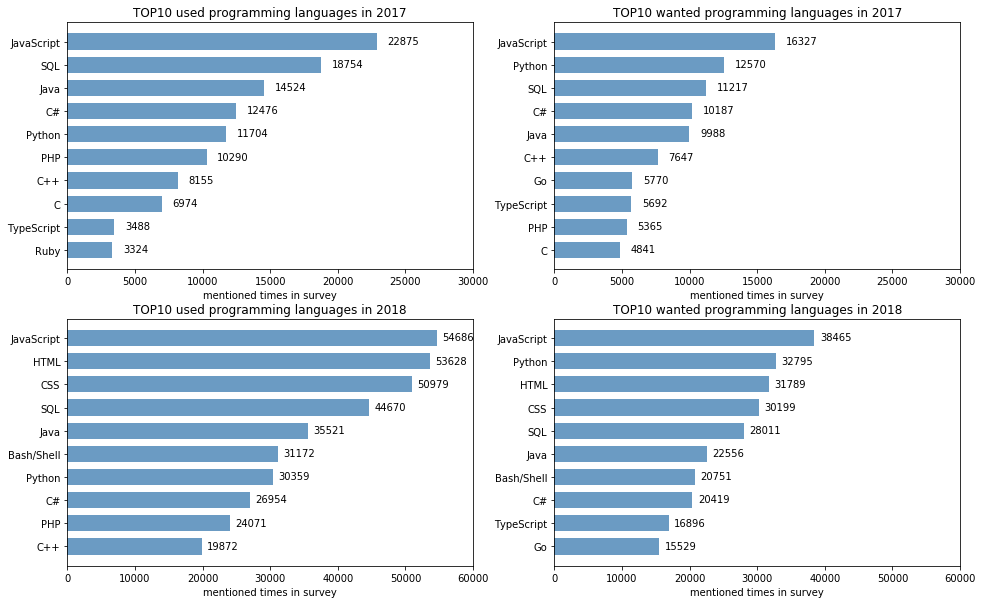

In [72]:
# visualize the results
plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
plt.barh(range(10,0,-1), df_17n_10.Mentioned_times, height=0.7, color='steelblue', alpha=0.8)    
plt.yticks(range(10,0,-1), df_17n_10.Language)
plt.xlim(0,30000)
plt.xlabel("mentioned times in survey")
plt.title("TOP10 used programming languages in 2017")
for x, y in enumerate(df_17n_10.Mentioned_times.sort_values()):
    plt.text(y + 800, x + 0.9, '%s' % y)

plt.subplot(2,2,2)
plt.barh(range(10,0,-1), df_17d_10.Mentioned_times, height=0.7, color='steelblue', alpha=0.8)    
plt.yticks(range(10,0,-1), df_17d_10.Language)
plt.xlim(0,30000)
plt.xlabel("mentioned times in survey")
plt.title("TOP10 wanted programming languages in 2017")
for x, y in enumerate(df_17d_10.Mentioned_times.sort_values()):
    plt.text(y + 800, x + 0.9, '%s' % y)

plt.subplot(2,2,3)
plt.barh(range(10,0,-1), df_18n_10.Mentioned_times, height=0.7, color='steelblue', alpha=0.8)    
plt.yticks(range(10,0,-1), df_18n_10.Language)
plt.xlim(0,60000)
plt.xlabel("mentioned times in survey")
plt.title("TOP10 used programming languages in 2018")
for x, y in enumerate(df_18n_10.Mentioned_times.sort_values()):
    plt.text(y + 800, x + 0.9, '%s' % y)

plt.subplot(2,2,4)
plt.barh(range(10,0,-1), df_18d_10.Mentioned_times, height=0.7, color='steelblue', alpha=0.8)    
plt.yticks(range(10,0,-1), df_18d_10.Language)
plt.xlim(0,60000)
plt.xlabel("mentioned times in survey")
plt.title("TOP10 wanted programming languages in 2018")
for x, y in enumerate(df_18d_10.Mentioned_times.sort_values()):
    plt.text(y + 800, x + 0.9, '%s' % y)
    
plt.show()

Surprisingly I find out that **JavaScript was in 2017 and is in 2018 the TOP1 used language**, the result is different than I expected.Since recently Pyhton gets more and more popular.But when I look at the TOP wanted languages, **Python is ranked 2nd** just after JavaScript in both year.

_In 2018 there are few newcomers in TOP10 list, such as HTML, Bash/Shell.Because they are suddenly so frequently used in 2018?_

In [73]:
# Check if those newcomers were in 2017's survey?

new_option_18 = []

for l in list(df_18n.Language):
    if l not in list(df_17n.Language):
        new_option_18.append(l)
        
new_option_18

['HTML',
 'CSS',
 'Bash/Shell',
 'Kotlin',
 'Cobol',
 'Delphi/Object Pascal',
 'Ocaml']

In [96]:
# Check if any option was removed in 2018's survey?

removed_option_17 = []

for l in list(df_17n.Language):
    if l not in list(df_18n.Language):
        removed_option_17.append(l)
        
removed_option_17

['Elixir', 'Smalltalk', 'Common Lisp', 'Dart']

Ok, those languages **(HTML, CSS, Bash/Shell, Kotlin, Cobol, Delphi/Object Pascal, Ocaml) are newly added to survey 2018**,not become famous overnight. Furthermore, 4 languages (**Elixir, Smalltalk, Common Lisp, Dart) are removed in survey 2018**.

### Quesion 2
**How the propotion of male and female programmers look like?**

_To answer this question, I need the columns **'Gender'**._

In [81]:
# create subsets for analysis.

sub_17 = df_17[['Gender']]
sub_18 = df_18[['Gender']]
sub_17.shape

(51392, 1)

In [95]:
# Print out the percentages

print('Percentage of male programmers in 2017: {:.1f} %'.format(list(sub_17.Gender.dropna()).count('Male')*100/sub_17.Gender.dropna().shape[0]))
print('Percentage of female programmers in 2017: {:.1f} %'.format(list(sub_17.Gender.dropna()).count('Female')*100/sub_17.Gender.dropna().shape[0]))

Percentage of male programmers in 2017: 90.1 %
Percentage of female programmers in 2017: 7.4 %


In [83]:
print('Percentage of male programmers in 2018: {:.1f} %'.format(list(sub_18.Gender.dropna()).count('Male')*100/sub_18.Gender.dropna().shape[0]))
print('Percentage of female programmers in 2018: {:.1f} %'.format(list(sub_18.Gender.dropna()).count('Female')*100/sub_18.Gender.dropna().shape[0]))

Percentage of male programmers in 2018: 92.2 %
Percentage of female programmers in 2018: 6.2 %


From  the analysis above, we see clearly that programming is a profession with a **high disproportion of males to females**.

### Quesion 3
**Where are the respondents from, how it changes over time?**

_To answer this question, I need column 'Country'._

In [181]:
# Create the subsets

sub_17c = df_17[['Country']].dropna()
sub_18c = df_18[['Country']].dropna()

In [182]:
# Check the TOP5 countries and prepare data for pie-charts.

pie_17 = pd.DataFrame(sub_17c.Country.value_counts().head(5)/sub_17c.shape[0])
pie_18 = pd.DataFrame(sub_18c.Country.value_counts().head(5)/sub_18c.shape[0])
pie_17

,Country
United States,0.222895
India,0.101125
United Kingdom,0.085519
Germany,0.080616
Canada,0.043450


([<matplotlib.patches.Wedge at 0x1f6c78db588>,
 [Text(0.876944,0.664055,'United States'),
  Text(-0.178848,1.08536,'India'),
  Text(-0.794676,0.760585,'Germany'),
  Text(-1.02994,0.386295,'United Kingdom'),
  Text(-1.09851,0.0571939,'Canada'),
  Text(0.0309402,-1.09956,'Other')],
 [Text(0.478333,0.362212,'20.6 %'),
  Text(-0.0975533,0.592016,'13.9 %'),
  Text(-0.43346,0.414865,'6.6 %'),
  Text(-0.561785,0.210706,'6.3 %'),
  Text(-0.599188,0.0311967,'3.4 %'),
  Text(0.0168765,-0.599763,'49.1 %')])

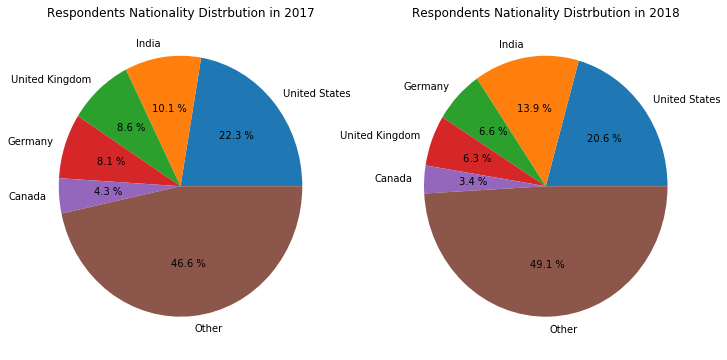

In [183]:
pie_17.loc['Other'] = 1-sum(pie_17['Country'])
pie_18.loc['Other'] = 1-sum(pie_18['Country'])
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('Respondents Nationality Distrbution in 2017')
plt.pie(x = pie_17.Country, labels = pie_17.index,autopct='%3.1f %%')

plt.subplot(1,2,2)
plt.title('Respondents Nationality Distrbution in 2018')
plt.pie(x = pie_18.Country, labels = pie_18.index,autopct='%3.1f %%')

Respondents from **US, India, UK, Germany, Canada** ranked TOP5 for both 2017 and 2018. 

In [103]:
# Just wonder how many chinese users are there

print(list(sub_17c.Country).count('China')/sub_17c.shape[0])
print(list(sub_18c.Country).count('China')/sub_18c.shape[0])

0.004650529265255293
0.010534014607437806
